# 1. Import libraries



In [681]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import array
import matplotlib.pyplot as pl
from sklearn.ensemble import VotingClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [682]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [683]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [684]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data description


The data provided is split into two groups:
1) The training set (train.csv)
2) The testing set (test.csv)

The training set includes a survival column which indicates whether or not the passenger survived. This data set is used to create the machine learning model.
The testing set is used to determine how well the model (generated from the training data set) performs on new unseen data. The testing data set does not provide the passengers' survival status. The model generated predicts the passengers' survival status.

The table below provides all the relevant information about the columns in the data sets:

| Column Name          | Description                                                | Key                    |
| ---------------------| ---------------------------------------------------------- | ---------------------- |
| __PassengerId__      | Passenger Identity                                         |                        | 
| __Survived__         | Passenger survival status                                  | 0 = No, 1 = Yes        | 
| __Pclass__           | Ticket class, a representation of socio-economic status (SES)| 1 = 1st class, 2 = 2nd class, 3 = 3rd class | 
| __Name__             | Passenger's name                                           |                        | 
| __Sex__              | Passenger's sex                                            |                        |
| __Age__              | Passengers age (in years)                                  |                        |
| __SibSp__            | Number of sibling and/or spouse travelling with passenger  |                        |
| __Parch__            | Number of parent and/or children travelling with passenger |                        |
| __Ticket__           | Ticket number                                              |                        |
| __Fare__             | Price of the ticket                                        |                        |
| __Cabin__            | Cabin number                                               |                        |
| __Embarked__         | Point of embarkation                                       | C = Cherbourg, Q = Queenstown, S = Southampton |

More information can be found under the [data](https://www.kaggle.com/c/titanic/)

# 4. Exploratory Data Analysis 


Exploratory data analysis is used to gain insight on the data provided. This is achieved by using visualisation tools such as graphs and tables. It will allow us to understand the data and derive preliminary conclusions. Furthermore, it will summerise important trends, characteristics, and abnormalities in the dataset which will ultimately aid in training the model.

The following is explored and analysed:
- Data Types
- The shape of the data
- Missing values in the data
- Statistics derived from the data

## 4.1 Data types,data shapes, missing data and summary statistics

### 4.1.1.Data Types

In [685]:
# Non-null count and data types of the training
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <font color='pink'>Observation:</font>  The training-set has 891 rows and 11 features including the __target variable (survived).__ 2 of the features are floats, 5 are integers and 5 are objects. When training, the model requires the data to all be in the form of numbers, therefore these columns will be converted later on.

### 4.1.2.Data Shape

In [686]:

print("The shape of the training data set: ", train.shape)
print("The shape of the testing data set: ", test.shape)


The shape of the training data set:  (891, 12)
The shape of the testing data set:  (418, 11)


<font color='pink'>Observation:</font> The testing data set has one column less column than the training data set (the Survived column). As discussed above in section 3, survived is our response/target variable and will therefore be determined from the model derived from the training data.

### 4.1.3.Missing Values

In [687]:

# Determine what percentage of data is missing values in each column of the training dataset
totalNumberOfDataPoints = train.isnull().sum().sort_values(ascending=False)
percentMissing = train.isnull().sum()/train.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat(
    [totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)


,Total missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [688]:

# Determine what percentage of data is missing values in each column of the testing dataset
totalNumberOfDataPoints = test.isnull().sum().sort_values(ascending=False)
percentMissing = test.isnull().sum()/test.isnull().count()*100
percentMissingRounded = (round(percentMissing, 1)).sort_values(ascending=False)
missingData = pd.concat(
    [totalNumberOfDataPoints, percentMissingRounded], axis=1, keys=['Total missing', '%'])
missingData.head(13)


,Total missing,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


<font color='pink'>Observation:</font> From the two tables above it can be seen that the training set has missing values in the Cabin, Age and Embarked columns. The testing dataset has missing values in the Cabin, Age and Fare columns. 
For the training dataset, the Embarked column only contains two missing values which can be easily dropped or filled. The Age column on the other hand has 177 missing values. We therefore, cannot drop the rows which have missing values in the age column as this will eliminate 20% of the training data. Therefore, these values need to be filled in. The approach taken to fill in the missing values is discussed below in section 5.2. Since the Cabin column is missing 77% of data points, we have decided to drop this column. 

### 4.1.4.Statistics

In [689]:

# Summary of the statistics for the training data set
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



The table above gives an overview of the central tendencies of the numeric data in the testing dataset. <br /> <font color='pink'>Observations:</font> 
- 38% of people in the training dataset survived the Titanic 
- The passenger age ranges from 0.4 to 80 years old.
- There is an outlier in the Fare column because of the differences between the 75th percentile, standard deviation, and the max value (512). We will thus determine how to deal with this outlier by either dropping its corresponding row or filling the outlier with an appropriate value. 

## 4.2 Feature analysis


For feature analysis the training dataset will be split into two categories:
1) Categorical variables
2) Numerical variables

Categorical variables have values belonging to one of two or more categories. Numerical variables have a continuous distribution.
Identifying which variables are categorical and which variables are numerical will hel structure the data analysis properly. For example it makes no sense to determine the average of a categorical variable such as sex or class. Furthermore, sex, class and embarked have no intrinsic ordering to its value. 

### 4.2.1 Categorical variables


In this data set the categorical variables are:
1) Sex
2) Pclass 
3) Embarked.

#### 4.2.1.1.Categorical variable: Sex

In [690]:
# Gia
# Value counts of the sex column
train['Sex'].value_counts(dropna=False)


male      577
female    314
Name: Sex, dtype: int64

<font color='pink'>Observation:</font> There are 263 more male passengers than female passengers in the training dataset. Therefore there it is assumend that the test dataset will have a similiar distribution of sex.

In [691]:

# Mean of survival according to sex
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean(
).sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

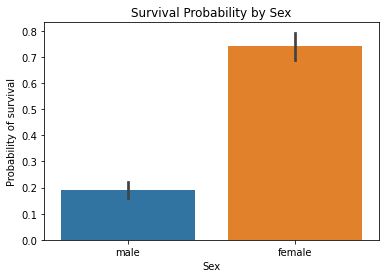

In [692]:

# visualisation for the probability of survival according to sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel('Probability of survival')
plt.title('Survival Probability by Sex')


<font color='pink'>Observation:</font> Female passengers are more likely to survive.

#### 4.2.1.2.Categorical variable: Pclass

In [693]:

# Value counts of the Pclass column in the training dataset

train['Pclass'].value_counts(dropna=False)


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [694]:

# Mean of survival by passenger class in the training dataset

train[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


([<matplotlib.axis.XTick at 0x1ddb95d3dc0>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

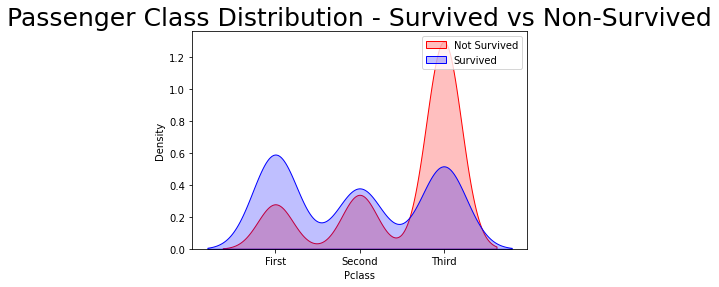

In [695]:

# Pclass distributions for survived and not survived
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Pclass'],
                 shade=True, color='r', label='Not Survived')
ax.legend()
ax = sns.kdeplot(train.loc[(train['Survived'] == 1),
                 'Pclass'], shade=True, color='b', label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()), labels)


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

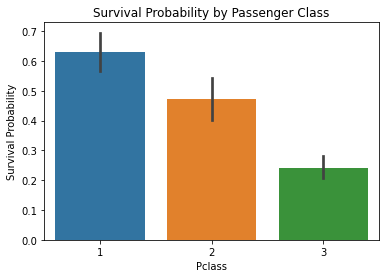

In [696]:

sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')


<font color='pink'>Observation:</font> The probability of survival decreases with a decrease in passenger class. It can therefore be assumed that first class passengers were prioritised during the evacuation. Evidently, from the two graphs above, Pclass plays an important role in determining whether a passenger did or did not survive. According to the training dataset, 63% of the 1st class passengers survived, 48% of the 2nd class passengers survived and only 24% of the 3rd class passengers survived.

#### 4.2.1.3.Categorical variables combined: Sex and Plass

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

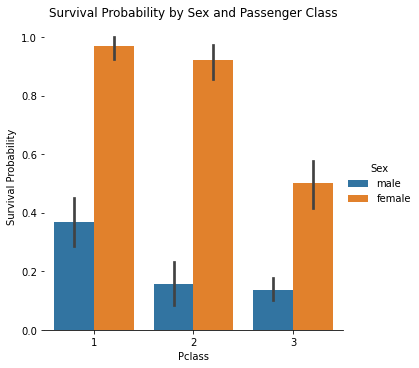

In [697]:

# Survival by gender and passenger class
sns.factorplot(x='Pclass', y='Survived', hue='Sex',
               data=train, kind='bar').despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')


<font color='pink'>Observation:</font>The graph above indicates that in every class, females where always more likely to survive. It can also be seen that males in the first class were more likely to survive than in any other class.

#### 4.2.1.4.Categorical variable: Embarked

In [698]:
# Value counts of the Embarked column
# NAN is the missing values in Embarked
train['Embarked'].value_counts(dropna=False)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [699]:
# Mean of survival by point of embarkation
train[['Embarked', 'Survived']].groupby(
    ['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

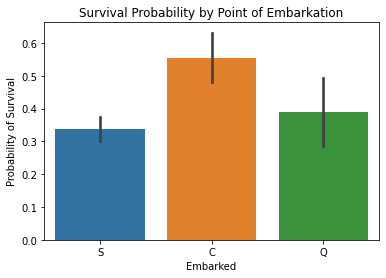

In [700]:
# Visualisation for the probability of survival according to point of embarkation
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Probability of Survival')
plt.title('Survival Probability by Point of Embarkation')


<font color='pink'>Observation:</font> The probability of survival is highest for location C and lowest for location S.
Perhaps first class passengers embarked from location C and therefore because first class passengers had a higher chance of survival, location c also has the highest chance of survival. As an alternative perhaps third class passengers embarked from location S and because third class passengers had the lowest chance of survival , location S also has the lowest survival probability. This hypothesis is tested in section 4.2.1.5 below. 

#### 4.2.1.5.Categorical variable combined: Embarked and Class

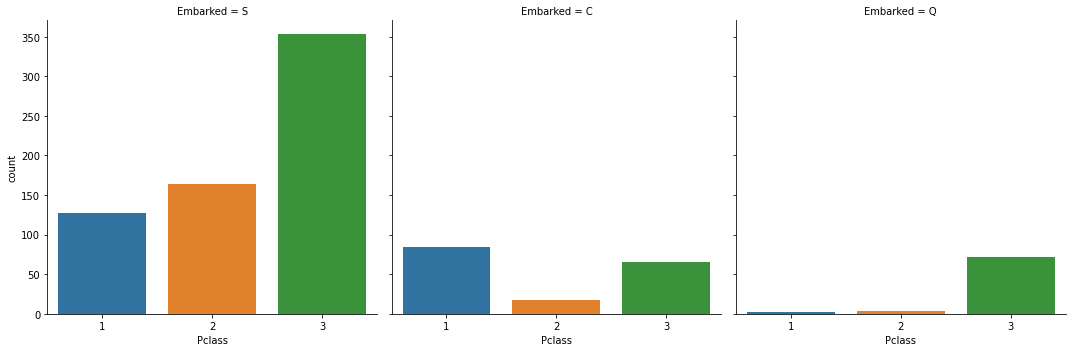

In [701]:
# Gia
# Visualisation for the relationship between class and embark
sns.factorplot('Pclass', col='Embarked', data=train, kind='count')


<font color='pink'>Observation:</font> The hypothesis discussed in section 4.1.2.4 appears to be correct.  Location S has majority of the third class passengers and the majority of passengers embarking from location C are first class.

### 4.2.2 Numerical variables

Gia
In this dataset, the numerical variables are:
1) SibSp
2) Parch
3) Age
4) Fare

#### 4.2.2.1.Detect outliers in numerical variables

Outliers are points in the dataset that don't conform with majority of the data (they are extreme values). Outliers need to be addressed as they tend to skew data and can cause inaccurate model predictions. The Tukey method is used to detect these outliers. Outliers can only be determined for numeric data.

In [702]:
# Function to predict outliers
def detect_outliers(df, n, features):
    """"
    This function loops through the list of features and detects outliers in each feature. A data point is considered to be 
    an outlier if it is less than Q1-1.5*IQR or if it is greater than Q3+1.5*IQR. Once the outliers have been determined for 
    a feature, their indices will be stored in a list and then the loop will proceed to the next feature. This process repeats
    until the last feature is complete. Finally, using the list with the indices of the outliers, the frequency of outliers is
    determined and if the frequency is greater than n then the list fill be returned.    
    """
    outlierIndices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlierStep = 1.5 * IQR
        outlierList = df[(df[col] < Q1 - outlierStep) |
                         (df[col] > Q3 + outlierStep)].index
        outlierIndices.extend(outlierList)
    outlierIndices = Counter(outlierIndices)
    multipleOutliers = list(
        key for key, value in outlierIndices.items() if value > n)
    return multipleOutliers


outliers_to_drop_test = detect_outliers(
    test, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("The indices where outliers occur are {}: ".format(
    len(outliers_to_drop)), outliers_to_drop)


The indices where outliers occur are 10:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [703]:
# Outliers in numerical variables
# Visualise the 10 rows identified above as rows containing outliers
train.loc[outliers_to_drop, :]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


#### 4.2.2.2.Numerical variables correlation with survival

Text(0.5, 1.0, 'Correlations Among Numeric Features')

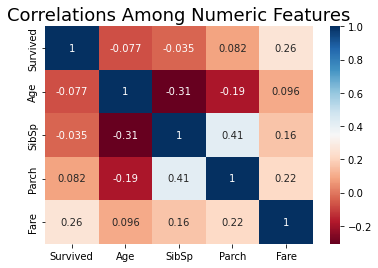

In [704]:
# Gia
# Heatmap of numerical variables
df_num = train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
sns.heatmap(df_num.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize=18)


<font color='pink'>Observation:</font> The heatmap displayed above shows that Parch and SiSp often travel together.Therefore it will useful to create a isAlone and a family size feature.
we also see that Fare has a pretty large positive correlation to survival, thus it may be an important metric in training the model. 

#### 4.2.2.3.Numerical variable: SibSp

In [705]:
# Value counts of the SibSp column
train['SibSp'].value_counts(dropna=False)


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [706]:
# Mean of survival by SibSp
train[['SibSp', 'Survived']].groupby(
    'SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

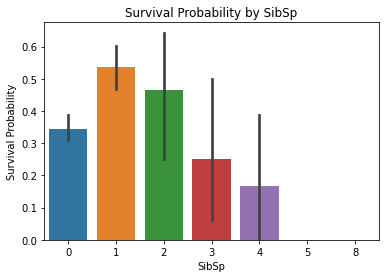

In [707]:
# Visualisation for probability of survival according to SiSP
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')


#### 4.2.2.4.Numerical variable: Parch

In [708]:
# Value counts of the Parch column
train['Parch'].value_counts(dropna=False)


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [709]:
# Mean of survival by Parch
train[['Parch', 'Survived']].groupby(
    'Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

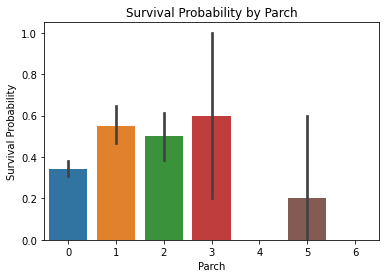

In [710]:
# Visualisation for probability of survival according to Parch
sns.barplot(x='Parch', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')


#### 4.2.2.5.Numerical variable: Age

Text(0.5, 1.0, 'Passenger Age Distribution')

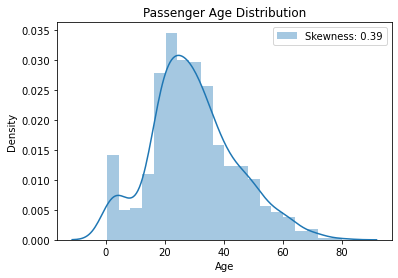

In [711]:
# Passenger age distribution
sns.distplot(train['Age'], label='Skewness: %.2f' % (train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')


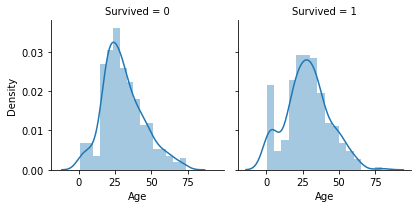

In [712]:
# Age distribution by survival
sns.FacetGrid(train, col='Survived').map(sns.distplot, 'Age')


Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

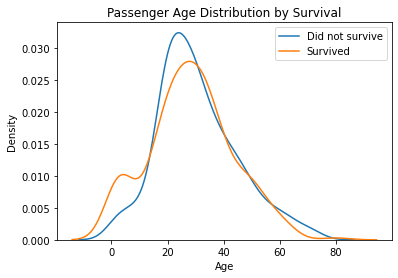

In [713]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label='Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label='Survived')
plt.xlabel('Age')
plt.legend()
plt.title('Passenger Age Distribution by Survival')


<font color='red'>AidenPotentially add explanation</font>

#### 4.2.2.6.Numerical variable: Fare

Text(0, 0.5, 'Passenger Fare Distribution')

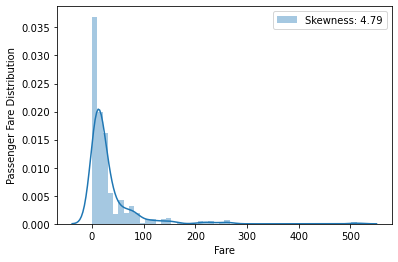

In [714]:
# Passenger fare distribution
sns.distplot(train['Fare'], label='Skewness: %.2f' % (train['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')


<font color='pink'>Observation:</font> The majority of passengers paid low fares where there are few people who paid very large fares.

### 4.2.3 Correlation between categorical and numerical

#### 4.2.3.1.All variables

<AxesSubplot:>

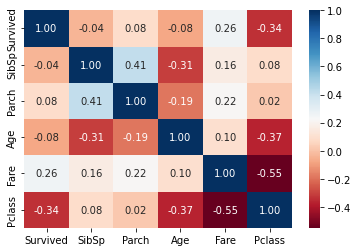

In [715]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare',
            'Pclass']].corr(), annot=True, fmt='.2f', cmap='RdBu')


<font color='pink'>Observation:</font>  Fare appears to have a high correlation with survival and Pclass has a high ngeative correlation with survival.

# 5. Data preprocessing

Now that we knwo what features are correlated and some other important factors, we can getthe dataset in a form to be modelled and trained. This includes:
- Dealing with ouliers
- Drop and fill missing values
- Data transformation 
- Feature engineering
- Feature encoding

## 5.1 Remove Outliers

In [716]:
# Drop outliers

print("Train Set Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("Train Set After: {} rows".format(len(train)))
print("Test Set Before: {} rows".format(len(test)))
test = test.drop(outliers_to_drop_test, axis = 0).reset_index(drop = True)
print("Test Set After: {} rows".format(len(test)))


Train Set Before: 891 rows
Train Set After: 881 rows
Test Set Before: 418 rows
Test Set After: 418 rows


## 5.2 Drop and fill missing values

In [717]:
# Drop ticket and cabin features from training and test set as they are unique or missing many values
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)


In [718]:
train.isnull().sum().sort_values(ascending=False)


Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [719]:
# Fill missing value in Embarked with mode as only 3 values
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode, inplace=True)


In [720]:
test.isnull().sum().sort_values(ascending=False)


Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [721]:
# Fill missing value for Fare
median = test['Fare'].dropna().median()
test['Fare'].fillna(median, inplace=True)


In [722]:
# Check where indecies of missing ages are
age_nan_indices_train = list(train[train['Age'].isnull()].index)
len(age_nan_indices_train)
age_nan_indices_test = list(test[test['Age'].isnull()].index)


Age is negatively correlated with SibSp, Parch and Pclass as shown in section 4. Loop through each of the rows which have the same corresponding values and fill the missing age with their median. Othwerise fill with the Age median.

In [723]:
for index in age_nan_indices_train:
    median_age = train['Age'].median()
    predict_age = train['Age'][(train['SibSp'] == train.iloc[index]['SibSp'])
                               & (train['Parch'] == train.iloc[index]['Parch'])
                               & (train['Pclass'] == train.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        train['Age'].iloc[index] = median_age
    else:
        train['Age'].iloc[index] = predict_age
combine = pd.concat([train, test], axis=0).reset_index(drop=True)
median_age = combine['Age'].median()
for index in age_nan_indices_test:
    # use larger sample to fill test data
    test['Age'].iloc[index] = median_age


In [724]:
# Make sure there are no more missing ages
print(train['Age'].isnull().sum())
test['Age'].isnull().sum()


0


0

## 5.3 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

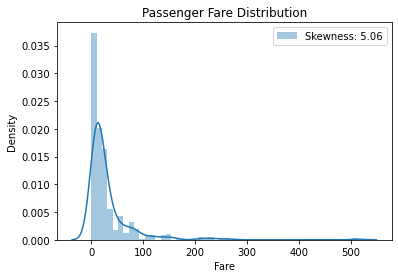

In [725]:
#  fare distribution

sns.distplot(train['Fare'], label='Skewness: %.2f' % (train['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')


In [726]:
# In order to reduce skewness in fare, apply log transformation
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)


Text(0.5, 1.0, 'Fare Distribution After Log Transformation')

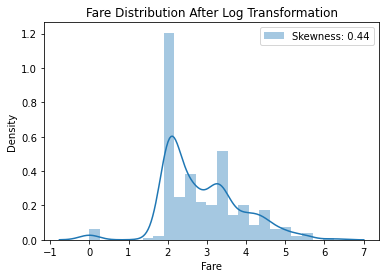

In [727]:
# After log transformation

sns.distplot(train['Fare'], label='Skewness: %.2f' % (train['Fare'].skew()))
plt.legend(loc='best')
plt.title('Fare Distribution After Log Transformation')


## 5.4 Feature engineering

We create new features from existing features to obtain an improved model.

### 5.4.1 Title

In [728]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


In [729]:
# Title from name column
train['Title'] = [name.split(',')[1].split('.')[0].strip()
                  for name in train['Name']]
train[['Name', 'Title']].head()
test['Title'] = [name.split(',')[1].split('.')[0].strip()
                 for name in test['Name']]
test[['Name', 'Title']].head()


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [730]:
# Value counts of Title
train['Title'].value_counts()


Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [731]:
# visualise the testing titles
test['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [732]:
# Simplify Title as there are several unique itles that do not necessarily have a trend

train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                         'Sir'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(
    ['Dr', 'Rev', 'Col',  'Capt', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')


In [733]:
# Drop name column as title has been extracted


train = train.drop('Name', axis=1)
train.head
test = test.drop('Name', axis=1)
test.head


<bound method NDFrame.head of      PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0            892       3    male  34.5      0      0  2.057860        Q   
1            893       3  female  47.0      1      0  1.945910        S   
2            894       2    male  62.0      0      0  2.270836        Q   
3            895       3    male  27.0      0      0  2.159003        S   
4            896       3  female  22.0      1      1  2.508582        S   
..           ...     ...     ...   ...    ...    ...       ...      ...   
413         1305       3    male  27.0      0      0  2.085672        S   
414         1306       1  female  39.0      0      0  4.690430        C   
415         1307       3    male  38.5      0      0  1.981001        S   
416         1308       3    male  27.0      0      0  2.085672        S   
417         1309       3    male  27.0      1      1  3.107198        C   

      Title  
0        Mr  
1       Mrs  
2        Mr  
3        Mr  

In [734]:
train[['Title', 'Survived']].groupby(
    ['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


<font color='pink'>Observation:</font> Woman and young males had a high chance of survival.

### 5.4.2 IsAlone

In [735]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['SibSp', 'Parch', 'FamilySize']].head()

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [736]:
# Create IsAlone feature as familySize may have more information than we need, leading to overfitting

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1


In [737]:
# Drop SibSp, Parch and FamilySize as this is contained in isAlone

train = train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test = test.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
train.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,22.0,1.981001,S,Mr,0
1,2,1,1,female,38.0,4.266662,C,Mrs,0
2,3,1,3,female,26.0,2.070022,S,Miss,1
3,4,1,1,female,35.0,3.972177,S,Mrs,0
4,5,0,3,male,35.0,2.085672,S,Mr,1


### 5.4.3 Age*Class

First convert Age into an ordinal variable. Group Ages into 5 age bands 

In [738]:

# train['AgeBand'] = pd.cut(train['Age'], 5)
# test['AgeBand'] = pd.cut(test['Age'], 5)

train['AgeBand'] = pd.cut(train['Age'], 4)
test['AgeBand'] = pd.cut(test['Age'], 4)
print(train['AgeBand'].head(10))


0    (20.315, 40.21]
1    (20.315, 40.21]
2    (20.315, 40.21]
3    (20.315, 40.21]
4    (20.315, 40.21]
5    (20.315, 40.21]
6    (40.21, 60.105]
7     (0.34, 20.315]
8    (20.315, 40.21]
9     (0.34, 20.315]
Name: AgeBand, dtype: category
Categories (4, interval[float64, right]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]


In [739]:
# train.loc[train['Age'] <= 16.136, 'Age'] = 0
# train.loc[(train['Age'] > 16.136) & (train['Age'] <= 32.102), 'Age'] = 1
# train.loc[(train['Age'] > 32.102) & (train['Age'] <= 48.068), 'Age'] = 2
# train.loc[(train['Age'] > 48.068) & (train['Age'] <= 64.034), 'Age'] = 3
# train.loc[train['Age'] > 64.034 , 'Age'] = 4

# test.loc[test['Age'] <= 16.136, 'Age'] = 0
# test.loc[(test['Age'] > 16.136) & (test['Age'] <= 32.102), 'Age'] = 1
# test.loc[(test['Age'] > 32.102) & (test['Age'] <= 48.068), 'Age'] = 2
# test.loc[(test['Age'] > 48.068) & (test['Age'] <= 64.034), 'Age'] = 3
# test.loc[test['Age'] > 64.034 , 'Age'] = 4

train.loc[train['Age'] <= 20.315, 'Age'] = 0
train.loc[(train['Age'] > 20.315) & (train['Age'] <= 40.21), 'Age'] = 1
train.loc[(train['Age'] > 40.21) & (train['Age'] <= 60.105), 'Age'] = 2
train.loc[train['Age'] > 60.105, 'Age'] = 3

test.loc[test['Age'] <= 20.315, 'Age'] = 0
test.loc[(test['Age'] > 20.315) & (test['Age'] <= 40.21), 'Age'] = 1
test.loc[(test['Age'] > 40.21) & (test['Age'] <= 60.105), 'Age'] = 2
test.loc[test['Age'] > 60.105, 'Age'] = 3

# Drop age band feature
train = train.drop('AgeBand', axis=1)
test = test.drop('AgeBand', axis=1)


In [740]:
# Convert ordinal Age into integer
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')
train['Age'].dtype


dtype('int32')

In [741]:
# Create Age*Class

train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']
train[['Age', 'Pclass', 'Age*Class']].head()


,Age,Pclass,Age*Class
0,1,3,3
1,1,1,1
2,1,3,3
3,1,1,1
4,1,3,3


In [742]:
# Bin Fare
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(test['Fare'], 4)
train['FareBand'].head(10)


0    (-0.001, 2.066]
1     (3.418, 6.239]
2     (2.066, 2.671]
3     (3.418, 6.239]
4     (2.066, 2.671]
5     (2.066, 2.671]
6     (3.418, 6.239]
7     (2.671, 3.418]
8     (2.066, 2.671]
9     (2.671, 3.418]
Name: FareBand, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.066] < (2.066, 2.671] < (2.671, 3.418] < (3.418, 6.239]]

In [743]:
# ordinal encoding, simliar to age
train.loc[train['Fare'] <= 2.066, 'Fare'] = 0
train.loc[(train['Fare'] > 2.066) & (train['Fare'] <= 2.671), 'Fare'] = 1
train.loc[(train['Fare'] > 2.671) & (train['Fare'] <= 3.418), 'Fare'] = 2
train.loc[train['Fare'] > 3.418, 'Fare'] = 3

test.loc[test['Fare'] <= 2.066, 'Fare'] = 0
test.loc[(test['Fare'] > 2.066) & (test['Fare'] <= 2.671), 'Fare'] = 1
test.loc[(test['Fare'] > 2.671) & (test['Fare'] <= 3.418), 'Fare'] = 2
test.loc[test['Fare'] > 3.418, 'Fare'] = 3


In [744]:
train = train.drop(['FareBand'], axis=1)
test = test.drop(['FareBand'], axis=1)


In [745]:
# Convert Fare into integer
train['Fare'] = train['Fare'].astype('int')
test['Fare'] = test['Fare'].astype('int')


## 5.5 Feature encoding 

Variables must be numeric to use for machine learning. Age and Fare were done when Binning. 

In [746]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,male,1,0,S,Mr,0,3
1,2,1,1,female,1,3,C,Mrs,0,1
2,3,1,3,female,1,1,S,Miss,1,3
3,4,1,1,female,1,3,S,Mrs,0,1
4,5,0,3,male,1,1,S,Mr,1,3


In [747]:
label = LabelEncoder()
train['Embarked'] = label.fit_transform(train['Embarked'])
test['Embarked'] = label.fit_transform(test['Embarked'])
train['Title'] = label.fit_transform(train['Title'])
test['Title'] = label.fit_transform(test['Title'])
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,0,2,2,0,3
1,2,1,1,1,1,3,0,3,0,1
2,3,1,3,1,1,1,2,1,1,3
3,4,1,1,1,1,3,2,3,0,1
4,5,0,3,0,1,1,2,2,1,3


In [748]:
train = train.drop('PassengerId', axis=1)
train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,1,3,0,3,0,1
2,1,3,1,1,1,2,1,1,3
3,1,1,1,1,3,2,3,0,1
4,0,3,0,1,1,2,2,1,3


In [749]:
train['Survived'] = train['Survived'].astype('int')
train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,1,3,0,3,0,1
2,1,3,1,1,1,2,1,1,3
3,1,1,1,1,3,2,3,0,1
4,0,3,0,1,1,2,2,1,3


In [750]:
test.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,1,0,1,2,1,3
1,893,3,1,2,0,2,3,0,6
2,894,2,0,3,1,1,2,1,6
3,895,3,0,1,1,2,2,1,3
4,896,3,1,1,1,2,3,0,3


<AxesSubplot:>

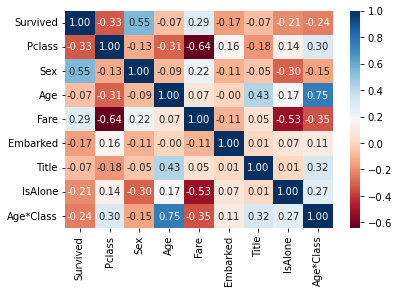

In [751]:
sns.heatmap(train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
            'Title', 'IsAlone', 'Age*Class']].corr(), annot=True, fmt='.2f', cmap='RdBu')


# 6. Modelling

For the modelling part of this project we will utilise the Scikit-learn library for machine learning. 

 As discussed above, this is a classfication problem, so consequently will use classfication models for our training.  We have chosen to investigate the performance of the following classifiers:

- Logistic regression
- Multi Layer Perceptron
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost
- Support vector machines

In this section , we will fit the models to the training data set and evaluate the models' prediction accuracy. Further on we  will implement hyperparameter tuning to further boost the performance of the the following models:

- Logistic regression
- Multi Layer Perceptron
- K-nearest neighbours
- Gaussian naive bayes

We are training our models using the entire training set provided. We then calculate the accuracy of each model for the training set data. In other words we  determine how accurate each model is when it is asked to predict the outcome  (survival)  for the passengers with  which it was trained. High scores might be an inidcation of which algorithms are likely to work well for predicting survival of passenges in the test set(this is the ultimate goal), however high scores could also indicate overfitting which will result in poor accuracy on the test set.

## 6.1 Split training data


Split the training data into a smaller training set as well as a validation set. This split will be done for different validation set sizes, to find the optimal split. The training and validation loss can be found using MSE, and then the accuracy scores can be compared to then hyperparameterise and cross-validate. 

In [752]:
target = train['Survived']
data = train.drop('Survived', axis=1)
X_train = [None]*5  # initiliaising arrays for different split ratios
X_test = [None]*5
t_train = [None]*5
t_test = [None]*5


logreg = [None]*5
score_test_lr = [None]*5
score_train_lr = [None]*5
train_predict_lr = [None]*5
test_predict_lr = [None]*5
mse_train_lr = [None]*5
mse_test_lr = [None]*5

knn = [None]*5
score_test_knn = [None]*5
score_train_knn = [None]*5
train_predict_knn = [None]*5
test_predict_knn = [None]*5
mse_train_knn = [None]*5
mse_test_knn = [None]*5

gnb = [None]*5
score_test_gnb = [None]*5
score_train_gnb = [None]*5
train_predict_gnb = [None]*5
test_predict_gnb = [None]*5
mse_train_gnb = [None]*5
mse_test_gnb = [None]*5

mlp = [None]*5
score_test_mlp = [None]*5
score_train_mlp = [None]*5
train_predict_mlp = [None]*5
test_predict_mlp = [None]*5
mse_train_mlp = [None]*5
mse_test_mlp = [None]*5

# for each MLA, try different test sizes, train on the training set, find predictions and errors
for i in range(1, 5):
    X_train[i], X_test[i], t_train[i], t_test[i] = train_test_split(
        data, target, test_size=(0.1*i))
    logreg[i] = LogisticRegression().fit(X_train[i], t_train[i])
    score_train_lr[i] = logreg[i].score(X_train[i], t_train[i])
    score_test_lr[i] = logreg[i].score(X_test[i], t_test[i])
    train_predict_lr[i] = logreg[i].predict(X_train[i])
    test_predict_lr[i] = logreg[i].predict(X_test[i])
    mse_train_lr[i] = mean_squared_error(t_train[i], train_predict_lr[i])
    mse_test_lr[i] = mean_squared_error(t_test[i], test_predict_lr[i])

    knn[i] = KNeighborsClassifier().fit(X_train[i], t_train[i])
    score_train_knn[i] = knn[i].score(X_train[i], t_train[i])
    score_test_knn[i] = knn[i].score(X_test[i], t_test[i])
    train_predict_knn[i] = knn[i].predict(X_train[i])
    test_predict_knn[i] = knn[i].predict(X_test[i])
    mse_train_knn[i] = mean_squared_error(t_train[i], train_predict_knn[i])
    mse_test_knn[i] = mean_squared_error(t_test[i], test_predict_knn[i])

    gnb[i] = GaussianNB().fit(X_train[i], t_train[i])
    score_train_knn[i] = gnb[i].score(X_train[i], t_train[i])
    score_test_gnb[i] = gnb[i].score(X_test[i], t_test[i])
    train_predict_gnb[i] = gnb[i].predict(X_train[i])
    test_predict_gnb[i] = gnb[i].predict(X_test[i])
    mse_train_gnb[i] = mean_squared_error(t_train[i], train_predict_gnb[i])
    mse_test_gnb[i] = mean_squared_error(t_test[i], test_predict_gnb[i])

    mlp[i] = MLPClassifier().fit(X_train[i], t_train[i])
    score_train_knn[i] = mlp[i].score(X_train[i], t_train[i])
    score_test_mlp[i] = mlp[i].score(X_test[i], t_test[i])
    train_predict_mlp[i] = mlp[i].predict(X_train[i])
    test_predict_mlp[i] = mlp[i].predict(X_test[i])
    mse_train_mlp[i] = mean_squared_error(t_train[i], train_predict_mlp[i])
    mse_test_mlp[i] = mean_squared_error(t_test[i], test_predict_mlp[i])


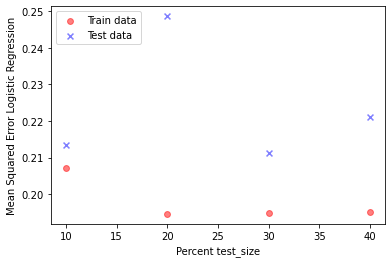

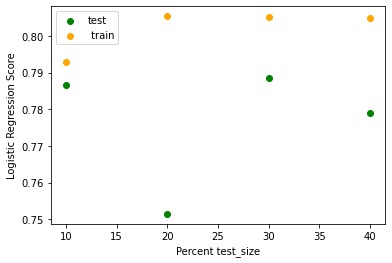

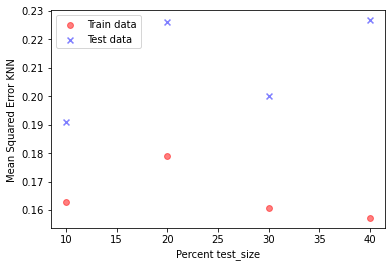

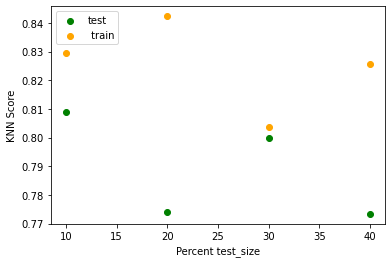

No handles with labels found to put in legend.


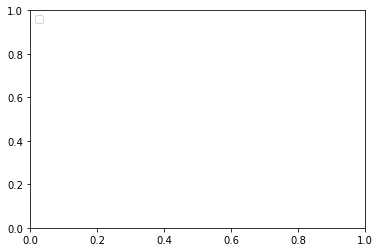

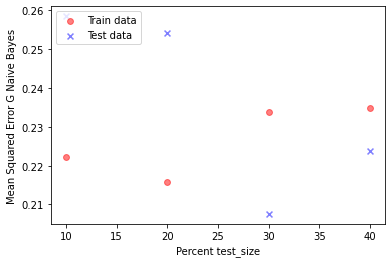

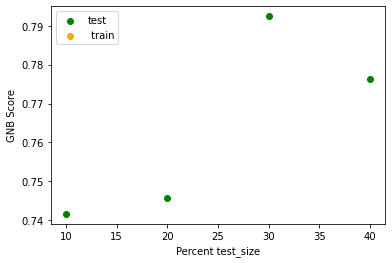

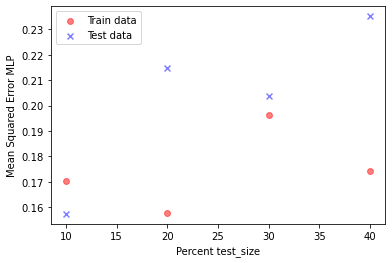

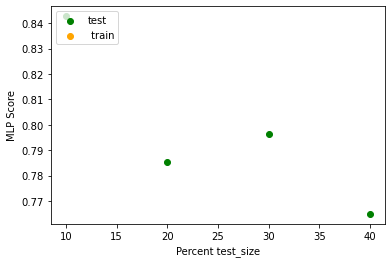

In [753]:
# plotting scores and MSEs

from numpy import array
import matplotlib.pyplot as pl

i1 = [0, 10, 20, 30, 40]

pl.figure()
pl.scatter(i1, mse_train_lr,
           c='red', marker='o', s=35, alpha=0.5,
           label='Train data')
pl.scatter(i1, mse_test_lr,
           c='blue', marker='x', s=35, alpha=0.5,
           label='Test data')
pl.xlabel('Percent test_size')
pl.ylabel('Mean Squared Error Logistic Regression')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, score_test_lr, c='green', label='test')
pl.scatter(i1, score_train_lr, c='orange', label=' train')
pl.xlabel('Percent test_size')
pl.ylabel('Logistic Regression Score')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, mse_train_knn,
           c='red', marker='o', s=35, alpha=0.5,
           label='Train data')
pl.scatter(i1, mse_test_knn,
           c='blue', marker='x', s=35, alpha=0.5,
           label='Test data')
pl.xlabel('Percent test_size')
pl.ylabel('Mean Squared Error KNN')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, score_test_knn, c='green', label='test')
pl.scatter(i1, score_train_knn, c='orange', label=' train')
pl.xlabel('Percent test_size')
pl.ylabel('KNN Score')
pl.legend(loc='upper left')
pl.show()
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, mse_train_gnb,
           c='red', marker='o', s=35, alpha=0.5,
           label='Train data')
pl.scatter(i1, mse_test_gnb,
           c='blue', marker='x', s=35, alpha=0.5,
           label='Test data')
pl.xlabel('Percent test_size')
pl.ylabel('Mean Squared Error G Naive Bayes')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, score_test_gnb, c='green', label='test')
pl.scatter(i1, score_train_gnb, c='orange', label=' train')
pl.xlabel('Percent test_size')
pl.ylabel('GNB Score')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, mse_train_mlp,
           c='red', marker='o', s=35, alpha=0.5,
           label='Train data')
pl.scatter(i1, mse_test_mlp,
           c='blue', marker='x', s=35, alpha=0.5,
           label='Test data')
pl.xlabel('Percent test_size')
pl.ylabel('Mean Squared Error MLP')
pl.legend(loc='upper left')
pl.show()

pl.figure()
pl.scatter(i1, score_test_mlp, c='green', label='test')
pl.scatter(i1, score_train_mlp, c='orange', label=' train')
pl.xlabel('Percent test_size')
pl.ylabel('MLP Score')
pl.legend(loc='upper left')
pl.show()


From the different split ratios above, we can see the MSE for training and validation sets. If MSE for train model is lower than for test model => overfitting. If it is higher => underfitting. We can then train the above models using the optimal split, i.e. when the  smallest difference between test and training loss occurs for each machine learning algorithm. 

In [754]:
# try KNN with split at 10% for validation as was the smallest difference between test and training loss

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=(0.1))
acc_knn = cross_val_score(KNeighborsClassifier(
), X_train, Y_train, scoring='accuracy', cv=10).mean()

# try logistic regression with split at 20%

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=(0.2))
acc_log = cross_val_score(LogisticRegression(), X_train,
                          Y_train, scoring='accuracy', cv=5).mean()

# try mlp with split at 30%

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=(0.3))
acc_mlp = cross_val_score(MLPClassifier(), X_train,
                          Y_train, scoring='accuracy', cv=3).mean()

# try gnb with split at 35%

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=(0.35))
acc_gnb = cross_val_score(GaussianNB(), X_train, Y_train,
                          scoring='accuracy', cv=3).mean()


In [755]:
models = pd.DataFrame({'Model': ['KNN', 'MLP', 'Gaussian NB', 'Logistic Regression',
                                 ],
                       'Score': [acc_knn, acc_mlp, acc_gnb, acc_log]})

models.sort_values(by='Score', ascending=False, ignore_index=True)


,Model,Score
0,KNN,0.801756
1,MLP,0.788997
2,Logistic Regression,0.772675
3,Gaussian NB,0.767521


We can now see how these models behave in a rudimentary way with specific splitting ratios of train and validation sets. We can train on the full dataset for these models, tune them and provide other methods and see if the accuracy improves. In this way we can improve the models. 


We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [756]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()  # why only drop now
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)


X_train shape:  (881, 8)
Y_train shape:  (881,)
X_test shape:  (418, 8)


## 6.2 Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set. 

### 6.2.1 Logistic regression

In [757]:
# rael
logReg = LogisticRegression()
LGtrained = logReg.fit(X_train, Y_train)
accuracy_log = round(logReg.score(X_train, Y_train) * 100, 2)


### 6.2.2 Support vector machines

In [758]:
# rael
svc = SVC()
SVCtrained = svc.fit(X_train, Y_train)
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)


### 6.2.3 K-nearest neighbours (KNN)

In [759]:
# rael

knn = KNeighborsClassifier(n_neighbors=5)
KNNtrained = knn.fit(X_train, Y_train)
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)


### 6.2.4 Gaussian naive bayes

In [760]:
# rael
gaussianNB = GaussianNB()
GNBtrained = gaussianNB.fit(X_train, Y_train)
accuracy_gaussian = round(gaussianNB.score(X_train, Y_train) * 100, 2)


### 6.2.5 Perceptron

In [761]:
# rael
perceptron = Perceptron()
peceptronTrained = perceptron.fit(X_train, Y_train)
accuracy_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)


### 6.2.6 Linear SVC

In [762]:
# rael
linearSVC = LinearSVC()
LSVCtrained = linearSVC.fit(X_train, Y_train)
accuracy_linear_svc = round(linearSVC.score(X_train, Y_train) * 100, 2)


### 6.2.7 Stochastic gradient descent

In [763]:
# rael
sgd = SGDClassifier()
SGDtrained = sgd.fit(X_train, Y_train)
accuracy_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


### 6.2.8 Decision tree

In [764]:
# rael
decision_tree = DecisionTreeClassifier()
DTtrained = decision_tree.fit(X_train, Y_train)
accuracy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
accuracy_decision_tree


86.72

### 6.2.9 Random forest

In [765]:
# rael
random_forest = RandomForestClassifier(n_estimators=100)
Rftrained = random_forest.fit(X_train, Y_train)
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


### 6.2.10 CatBoost

In [766]:
# rael
catBoost = CatBoostClassifier()
CBtrained = catBoost.fit(X_train, Y_train)
accuracy_catboost = round(catBoost.score(X_train, Y_train) * 100, 2)


Learning rate set to 0.00976
0:	learn: 0.6870018	total: 938us	remaining: 937ms
1:	learn: 0.6803061	total: 1.94ms	remaining: 969ms
2:	learn: 0.6764860	total: 2.67ms	remaining: 887ms
3:	learn: 0.6707076	total: 3.27ms	remaining: 815ms
4:	learn: 0.6650311	total: 4.08ms	remaining: 813ms
5:	learn: 0.6589076	total: 4.99ms	remaining: 827ms
6:	learn: 0.6530322	total: 5.81ms	remaining: 825ms
7:	learn: 0.6479857	total: 6.48ms	remaining: 803ms
8:	learn: 0.6423746	total: 7.32ms	remaining: 806ms
9:	learn: 0.6366550	total: 8.1ms	remaining: 802ms
10:	learn: 0.6315385	total: 8.98ms	remaining: 807ms
11:	learn: 0.6259286	total: 9.98ms	remaining: 822ms
12:	learn: 0.6206812	total: 10.9ms	remaining: 829ms
13:	learn: 0.6161335	total: 11.6ms	remaining: 814ms
14:	learn: 0.6115950	total: 12.5ms	remaining: 820ms
15:	learn: 0.6069160	total: 13.4ms	remaining: 822ms
16:	learn: 0.6021641	total: 14.2ms	remaining: 821ms
17:	learn: 0.5980862	total: 15.1ms	remaining: 822ms
18:	learn: 0.5943286	total: 15.9ms	remaining: 8

### 6.2.11 multilayer perceptron

In [767]:
# rael
# MLP
mlp = MLPClassifier()
MLPtrained = mlp.fit(X_train, Y_train)
accuracy_mlp = round(mlp.score(X_train, Y_train) *
                     100, 2)  # made a change here


## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

### 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

Internal comment: Viewing and summarising the scores calcualted above for each algorithm. These models have have not yet been tuned

In [768]:
# rael
# creating a dataframe to store the score of each model based on the training data
# This will allows us to find early identifiers indicating which  models that are likely to have
# a high prediction sucess rate with the test data and which ones might be overfitted.
models = pd.DataFrame({'Model': ['Multilayer perceptron', 'Logistic Regression', 'Naive Bayes', 'K Nearest Neighbours',
                                 'Support Vector Machines', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Perceptron', 'Random Forest', 'Cat Boost', 'Decision Tree'],
                       'Score': [accuracy_mlp, accuracy_log, accuracy_gaussian,  accuracy_knn, accuracy_svc,
                                 accuracy_sgd, accuracy_linear_svc, accuracy_perceptron, accuracy_random_forest, accuracy_catboost, accuracy_decision_tree]})

models.sort_values(by='Score', ascending=False, ignore_index=True)


,Model,Score
0,Random Forest,86.72
1,Decision Tree,86.72
2,Cat Boost,86.61
3,K Nearest Neighbours,84.68
4,Multilayer perceptron,82.75
5,Support Vector Machines,82.63
6,Linear SVC,79.34
7,Logistic Regression,79.11
8,Perceptron,78.32
9,Naive Bayes,77.07


### 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [769]:
# Create a list which contains classifiers
# Rael
classifiers = [MLPClassifier(),
               LogisticRegression(),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(),
               SGDClassifier(),
               LinearSVC(),
               Perceptron(),
               RandomForestClassifier(),
               CatBoostClassifier(),
               DecisionTreeClassifier()
               ]


if len(classifiers) is not 11:  # assuming we intend to use 11 classifiers
    print("error")

cross_val_results = []
for classifier in classifiers:  # each result has k subcomponents.Cv=k
    cross_val_results.append(cross_val_score(
        classifier, X_train, Y_train, scoring='accuracy', cv=5))
    # we need to try other cv's if this affects other parts of the code
    # potentially mifht be a place for tuning using grid search


Learning rate set to 0.008868
0:	learn: 0.6875859	total: 675us	remaining: 675ms
1:	learn: 0.6812358	total: 1.36ms	remaining: 678ms
2:	learn: 0.6779061	total: 1.98ms	remaining: 657ms
3:	learn: 0.6726436	total: 2.61ms	remaining: 650ms
4:	learn: 0.6672027	total: 3.34ms	remaining: 665ms
5:	learn: 0.6615069	total: 4.05ms	remaining: 671ms
6:	learn: 0.6558703	total: 4.72ms	remaining: 670ms
7:	learn: 0.6511665	total: 5.32ms	remaining: 660ms
8:	learn: 0.6461879	total: 5.99ms	remaining: 659ms
9:	learn: 0.6406081	total: 6.69ms	remaining: 662ms
10:	learn: 0.6358554	total: 7.39ms	remaining: 665ms
11:	learn: 0.6303755	total: 8.08ms	remaining: 665ms
12:	learn: 0.6255666	total: 8.83ms	remaining: 670ms
13:	learn: 0.6213261	total: 9.36ms	remaining: 659ms
14:	learn: 0.6169661	total: 10ms	remaining: 660ms
15:	learn: 0.6127838	total: 10.7ms	remaining: 655ms
16:	learn: 0.6082406	total: 11.4ms	remaining: 661ms
17:	learn: 0.6042363	total: 12.2ms	remaining: 664ms
18:	learn: 0.6005683	total: 12.8ms	remaining: 6

In [770]:
# Mean and standard deviation of cross validation results for each classifier

cross_val_mean = []
cross_val_std = []
for cross_val_result in cross_val_results:
    cross_val_mean.append(cross_val_result.mean())
    cross_val_std.append(cross_val_result.std())


# putting our cross val mean and standard deviation for each algorithm into a data frame
cross_val_res = pd.DataFrame({'Cross Validation Mean': cross_val_mean, 'Cross Validation Std': cross_val_std, 'Algorithm': [
                             'Multilayer perceptron', 'Logistic Regression', 'Naive Bayes', 'K Nearest Neighbours', 'Support Vector Machines', 'Stochastic Gradient Decent', 'Linear SVC', 'Perceptron', 'Random Forest', 'Cat Boost', 'Decision Tree']})
cross_val_res.sort_values(by='Cross Validation Mean',
                          ascending=False, ignore_index=True)


,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.824031,0.023217,Support Vector Machines
1,0.818394,0.020273,Cat Boost
2,0.817302,0.027756,Random Forest
3,0.808166,0.009882,Multilayer perceptron
4,0.807069,0.018987,Decision Tree
5,0.801355,0.018042,K Nearest Neighbours
6,0.786627,0.018265,Logistic Regression
7,0.784335,0.016475,Linear SVC
8,0.762821,0.023868,Perceptron
9,0.760587,0.040027,Naive Bayes


Text(0.5, 1.0, 'Cross Validation Scores')

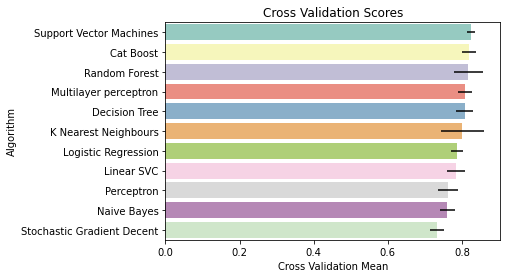

In [771]:
sns.barplot('Cross Validation Mean', 'Algorithm', data=cross_val_res, order=cross_val_res.sort_values(
    by='Cross Validation Mean', ascending=False)['Algorithm'], palette='Set3', **{'xerr': cross_val_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')


## 6.3.3. Learning curves

In [772]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'c:\\Users\\shell\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

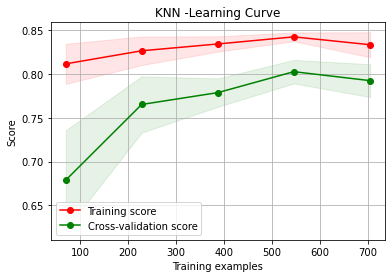

In [773]:
# KNN - Learning Curve
plot_learning_curve(estimator=KNNtrained, title="KNN -Learning Curve",
                    X=X_train, y=Y_train, cv=5)


<module 'matplotlib.pyplot' from 'c:\\Users\\shell\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

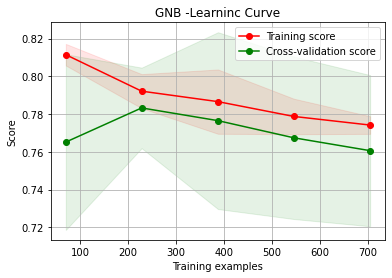

In [774]:
# Gaussian naive bayes - Learning Curve
plot_learning_curve(estimator=GNBtrained, title="GNB -Learninc Curve",
                    X=X_train, y=Y_train, cv=5)


<module 'matplotlib.pyplot' from 'c:\\Users\\shell\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

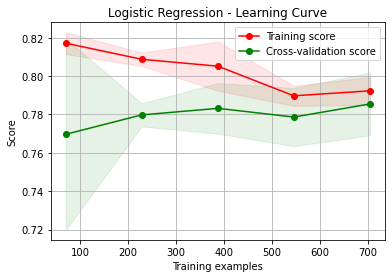

In [775]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
plot_learning_curve(estimator=LGtrained, title="Logistic Regression - Learning Curve",
                    X=X_train, y=Y_train, cv=5)


In [776]:
#
# this does not converge nicely


## 6.3.3 Hyper Paramter tuning


As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

### 6.3.3.1 Hyperparameter tuning for MLP

Hyperparameter tuning is the process of tuning the parameters of a model. Here Aiden will tune the parameters of support vector classifier using GridSearchCV.

### 6.3.3.2 Hyperparameter tuning for KNN

Hyperparameter tuning is the process of tuning the parameters of a model. Here Rael will tune the parameters of support vector classifier using GridSearchCV.

### 6.3.3.3 Hyperparameter tuning for GNB

Hyperparameter tuning is the process of tuning the parameters of a model. Here Ben will tune the parameters of support vector classifier using GridSearchCV.

### 6.3.3.4 Sub-feature selection and hyper parameter tuning for Logistic Regression

#### 6.3.3.4.1 Sub-feature selection for Logistic Regression

##### 6.3.3.4.1.1 Recursive feature elimination (RFE)

This selects features by recursively considering smaller and smaller sets of features. The estimator is initially trained on all the features and then the importance of each feature is obtained by the feature_importances attribute. The least important features are then removed from the training data until the optimal number of features are included in the training data

In [777]:
train.head(13)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,1,3,0,3,0,1
2,1,3,1,1,1,2,1,1,3
3,1,1,1,1,3,2,3,0,1
4,0,3,0,1,1,2,2,1,3
5,0,3,0,1,1,1,2,1,3
6,0,1,0,2,3,2,2,1,2
7,0,3,0,0,2,2,0,0,0
8,1,3,1,1,1,2,3,0,3
9,1,2,1,0,2,0,3,0,0


##### 6.3.3.4.1.2 Feature ranking including recursive feature elimination and cross-validation

RFECV uses a cross validation loop and performs RFE. It finds the optimal number of features to use. Next, the recursive feature elimination is applied on the logistic regression with an automatic tuning of the number of features selected from the cross validation.

Optimal number of features: 6
Selected features: ['Pclass', 'Sex', 'Age', 'Embarked', 'Title', 'Age*Class']


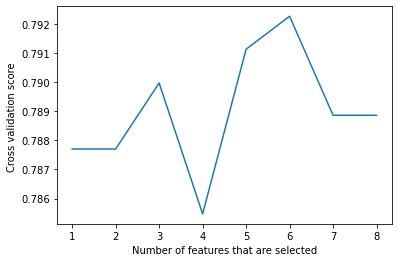

In [778]:
from sklearn.feature_selection import RFECV

# the number of correct classifications (survived or did not survive) is proportional to the "accuracy" scoring
RFECV = RFECV(estimator=logReg, step=1, cv=10, scoring='accuracy')
RFECV.fit(X_train, Y_train)

print("Optimal number of features: %d" % RFECV.n_features_)
print('Selected features: %s' % list(X_train.columns[RFECV.support_]))

# Plot the number of features VS. the CV scores
plt.xlabel("Number of features that are selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(RFECV.grid_scores_) + 1), RFECV.grid_scores_)
plt.show()


<font color='pink'>Observation:</font> The optimal number of features is 6 and the isAlone feature is dropped

##### 6.3.3.4.1.2 Evaluation of the model based on splitting the training into train and validation

In [779]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# These are the best features determined above
featuresChosen = list(X_train.columns[RFECV.support_])
# create X (features that are chosen) and y (response--survival outcome)
X_train_logreg = X_train[featuresChosen]
X_test_logreg = X_test[featuresChosen]


#  different random_state values are used to split into train and test
# changing the random_state scores changes accuracy
# testing scores are  high-variance estimates as the scores change a lot
X_train_temp, X_validation, Y_train_temp, Y_validation = train_test_split(
    X_train_logreg, Y_train, test_size=0.2, random_state=2)

# classification scores for logReg
logReg.fit(X_train_temp, Y_train_temp)
GiaOutput1 = logReg.predict(X_validation)
y_pred_proba = logReg.predict_proba(X_validation)[:, 1]
# fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Validation split results:')
print(logReg.__class__.__name__+" accuracy is %2.3f" %
      accuracy_score(Y_validation, GiaOutput1))
print(logReg.__class__.__name__+" log_loss is %2.3f" %
      log_loss(Y_validation, y_pred_proba))
#print(logReg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Validation split results:
LogisticRegression accuracy is 0.819
LogisticRegression log_loss is 0.408


##### 6.3.3.4.1.3 Evaluation of the model based on k-fold cross_val_score

In [780]:
# 10-fold cross-validation logistic regression

# cv=5 for 5 folds

scores_accuracy = cross_val_score(logReg, , y, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logReg, X, y, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logReg, X, y, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logReg.__class__.__name__+" average accuracy is %2.3f" %
      scores_accuracy.mean())
print(logReg.__class__.__name__ +
      " average log_loss is %2.3f" % -scores_log_loss.mean())
print(logReg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


SyntaxError: invalid syntax (Temp/ipykernel_20708/1964007163.py, line 5)

##### 6.3.3.4.1.4 Evaluation of the model based on k-fold cross_validate

In [781]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy',
           'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(logReg, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for score in range(len(scoring)):
    print(logReg.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[score], -results['test_%s' % list(scoring.values())[score]].mean()
                                                                     if list(scoring.values())[score] == 'neg_log_loss'
                                                                     else results['test_%s' % list(scoring.values())[score]].mean(),
                                                                     results['test_%s' % list(scoring.values())[score]].std()))


K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.019)
LogisticRegression average log_loss: 0.456 (+/-0.039)
LogisticRegression average auc: 0.846 (+/-0.031)


#### 6.3.3.4.2 Hyperparameter tuning for Logistic Regression

Hyperparameter tuning is the process of tuning the parameters of a model. Here Gia will tune the parameters of support vector classifier using GridSearchCV.

In [782]:
from sklearn.model_selection import GridSearchCV

X = train[featuresChosen]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy',
           'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

best_model=gs.fit(X_train_logreg, Y_train)
logreg_trained_tuned=best_model.best_estimator_.fit(X, Y_train)
gia_output_3=logreg_trained_tuned.predict(X_test[featuresChosen])
results =gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.40001000000000003)
best params: {'C': 0.40001000000000003}
best score: 0.79341164453524


Our mean cross validation score improved slightly.

### 6.3.4 Ensembles

In [783]:
# the rhs  will be replaced with the tuned models, right now
best_trained_MLP = MLPtrained
best_trained_knn = KNNtrained
best_trained_lg = LGtrained
best_trained_GNB = GNBtrained


voting_classifier_hard = VotingClassifier(estimators=[('mlp', best_trained_MLP), (
    'knn', best_trained_knn), ('lg', best_trained_lg), ('gnb', best_trained_GNB)], voting='hard')
voting_classifier_hard_trained = voting_classifier_hard.fit(X_train, Y_train)
survival_predications = voting_classifier_hard_trained.predict(X_test)

print('voting classifier cross validation score :', cross_val_score(
    voting_classifier_hard, X_train, Y_train, cv=5))
print('voting classifier cross validation score mean :', cross_val_score(
    voting_classifier_hard, X_train, Y_train, cv=5).mean())
print('voting classifier cross validation score standard deviation :',
      cross_val_score(voting_classifier_hard, X_train, Y_train, cv=5).std())


voting classifier cross validation score : [0.80225989 0.80681818 0.80113636 0.78409091 0.82954545]
voting classifier cross validation score mean : 0.808166409861325
voting classifier cross validation score standard deviation : 0.015510436744323994


# 7. Preparing data for submission

In [ ]:
# ss.head()


In [ ]:
# ss.shape


We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [784]:
# Create submission dataframe

submit = pd.DataFrame(
    {'PassengerId': test['PassengerId'], 'Survived': survival_predications})
submit2 = pd.DataFrame(
    {'PassengerId': test['PassengerId'], 'Survived': gia_output_3})
submit.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [785]:
submit.shape
submit2.shape


(418, 2)

Our dataframe is ready for submission!

In [ ]:
# Create and save csv file

submit.to_csv("submission.csv", index=False)
submit2.to_csv("gia_submission.csv", index=False)


# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)

## References
https://github.com/chongjason914/kaggle-titanic 

https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://github.com/murilogustineli/Titanic-Classification

https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook
